In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the co-occurrences DataFrame
relationships_df = pd.read_csv('cooccurrences.csv')

# Get the co-occurrence counts
counts = relationships_df['weight']

# Sort the counts
sorted_counts = np.sort(counts)

# Calculate the cumulative distribution
cdf = np.arange(len(sorted_counts)) / float(len(sorted_counts))

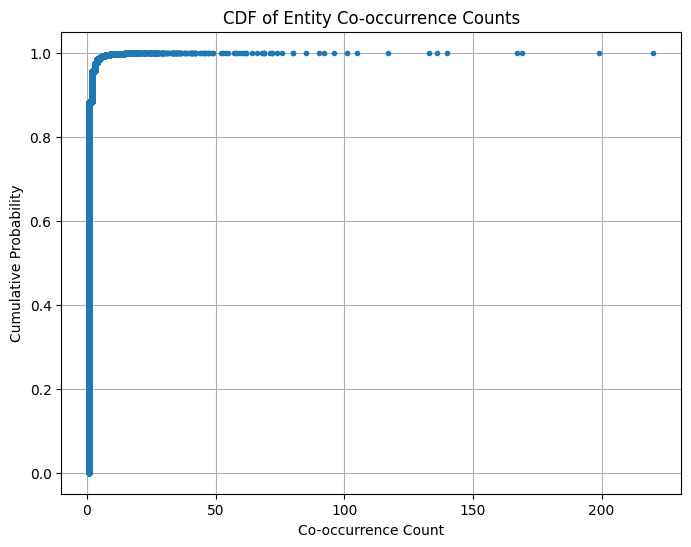

In [3]:

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_counts, cdf, marker='.', linestyle='none')
plt.xlabel('Co-occurrence Count')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Entity Co-occurrence Counts')
plt.grid(True)
plt.show()

In [4]:
!pip install kneed


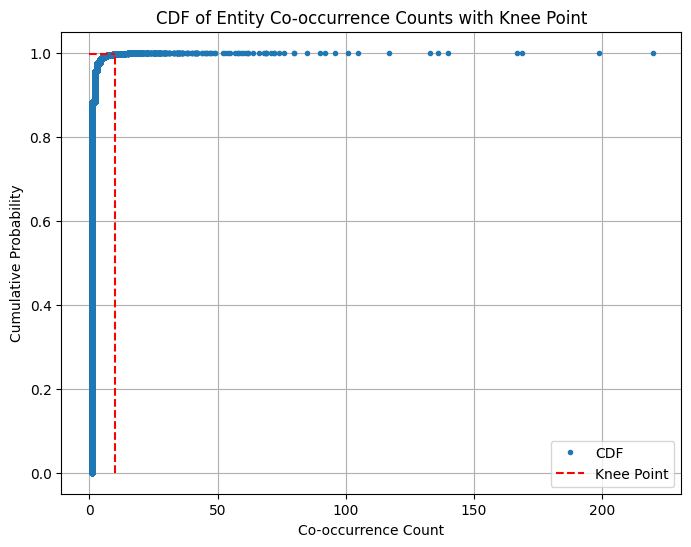

The knee point is at co-occurrence count: 10


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from kneed import KneeLocator

relationships_df = pd.read_csv('cooccurrences.csv')

# Get the co-occurrence counts
counts = relationships_df['weight']

# Sort the counts
sorted_counts = np.sort(counts)

# Calculate the cumulative distribution
cdf = np.arange(len(sorted_counts)) / float(len(sorted_counts))

# Find the knee point
knee = KneeLocator(sorted_counts, cdf, curve='concave', direction='increasing')

# Plot the CDF with the knee point
plt.figure(figsize=(8, 6))
plt.plot(sorted_counts, cdf, marker='.', linestyle='none', label='CDF')
plt.vlines(knee.knee, 0, knee.knee_y, linestyles='dashed', colors='r', label='Knee Point')
plt.hlines(knee.knee_y, 0, knee.knee, linestyles='dashed', colors='r')
plt.xlabel('Co-occurrence Count')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Entity Co-occurrence Counts with Knee Point')
plt.legend()
plt.grid(True)
plt.show()

print(f"The knee point is at co-occurrence count: {knee.knee}")


In [6]:
significant_cooccurrences = relationships_df[relationships_df['weight'] >= knee.knee]
print("Significant Co-occurrences:")
print(significant_cooccurrences)


Significant Co-occurrences:
                entity1                     entity2  weight
122                 MVA            Uddhav Thackeray      10
128            Congress                         NCP      19
136                 TOI  the agriculture department      10
140                 TOI                    Vidarbha      12
200           Amaravati                  VIJAYAWADA      14
...                 ...                         ...     ...
172995              SKM    the Sanyukt Kisan Morcha      11
190574    Muzaffarnagar                         SKM      11
203697              BJP             Lakhimpur Kheri      25
204105  Lakhimpur Kheri                       Union      11
204661      Ajay Mishra             Lakhimpur Kheri      11

[905 rows x 3 columns]


In [ ]:
# Delete relationships below the knee point
# MATCH (e1:Entity)-[r:CO_OCCURS_WITH]-(e2:Entity)
# WHERE r.weight < {knee_point}
# DELETE r;